In [15]:
import pandas as pd
import os

In [33]:
# Define file paths
data_path = "../data/raw/"
file_store1 = os.path.join(data_path, "Store_Sales_Data.csv")
file_store2 = os.path.join(data_path, "Store_Sales_Data2.csv")

In [34]:
# Load both CSVs
df_store1 = pd.read_csv(file_store1)
df_store2 = pd.read_csv(file_store2)

In [35]:
# Display basic info
print("Datasets loaded successfully")
print("Store 1 shape:", df_store1.shape, "| Store 2 shape:", df_store2.shape)

Datasets loaded successfully
Store 1 shape: (1000, 5) | Store 2 shape: (50, 5)


In [37]:
# Preview the first few rows
df_store1.head()

,Fecha,Producto,Cantidad,Precio Unitario,Total Venta
0,1/17/2023,Electrónic,7,200,1400
1,9/1/2023,Electrónic,8,200,1600
2,7/29/2023,Juguetes,3,30,90
3,10/4/2023,Alimentos,4,10,40
4,2/28/2023,Electrónic,6,200,1200


In [36]:
# TRANSFORM: Standardize, clean, and merge both datasets

In [38]:
# Standardize column names
df_store1.columns = df_store1.columns.str.strip().str.lower().str.replace(' ', '_')
df_store2.columns = df_store2.columns.str.strip().str.lower().str.replace(' ', '_')

In [39]:
# Add store identifier
df_store1['store'] = 'Store_1'
df_store2['store'] = 'Store_2'

In [40]:
# Merge datasets vertically
df_sales = pd.concat([df_store1, df_store2], ignore_index=True)

In [41]:
print("Combined dataset:", df_sales.shape)
df_sales.head()

Combined dataset: (1050, 6)


,fecha,producto,cantidad,precio_unitario,total_venta,store
0,1/17/2023,Electrónic,7,200,1400,Store_1
1,9/1/2023,Electrónic,8,200,1600,Store_1
2,7/29/2023,Juguetes,3,30,90,Store_1
3,10/4/2023,Alimentos,4,10,40,Store_1
4,2/28/2023,Electrónic,6,200,1200,Store_1


In [42]:
# CLEANING: Handle nulls, duplicates, and inconsistent values

In [43]:
df.dtypes

fecha              datetime64[ns]
producto                   object
cantidad                    int64
precio_unitario             int64
total_venta                 int64
store                      object
dtype: object

In [44]:
# Convert date column
df_sales['fecha'] = pd.to_datetime(df_sales['fecha'], errors='coerce')

In [45]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 fecha              0
producto           0
cantidad           0
precio_unitario    0
total_venta        0
store              0
dtype: int64


In [46]:
# Remove duplicates
df_sales.drop_duplicates(inplace=True)

In [47]:
# Convert numeric columns
df_sales['cantidad'] = pd.to_numeric(df_sales['cantidad'], errors='coerce')
df_sales['precio_unitario'] = pd.to_numeric(df_sales['precio_unitario'], errors='coerce')

In [48]:
# Recalculate total sales for consistency
df_sales['total_venta'] = df_sales['cantidad'] * df_sales['precio_unitario']

In [49]:
# VALIDATION: Check for anomalies and invalid values

In [50]:
# Identify negative or zero quantities/prices
invalid_rows = df_sales[(df_sales['cantidad'] <= 0) | (df_sales['precio_unitario'] <= 0)]
print(f"Invalid records: {invalid_rows.shape[0]}")

Invalid records: 0


In [51]:
# Remove invalid rows
df_sales = df_sales[(df_sales['cantidad'] > 0) & (df_sales['precio_unitario'] > 0)]

In [52]:
# Display date range for sanity check
print("Date range:", df_sales['fecha'].min(), "→", df_sales['fecha'].max())

Date range: 2023-01-01 00:00:00 → 2023-12-31 00:00:00


In [53]:
# TRANSFORMATION: Generate key metrics and summary tables

In [54]:
# Extract month and year
df_sales['year'] = df_sales['fecha'].dt.year
df_sales['month'] = df_sales['fecha'].dt.month_name()

In [55]:
# Monthly sales by store
monthly_sales = df_sales.groupby(['year', 'month', 'store'])['total_venta'].sum().reset_index()

In [56]:
# Top products by total sales
top_products = df_sales.groupby('producto')['total_venta'].sum().sort_values(ascending=False).head(10)

In [57]:
print("Data transformations completed")
monthly_sales.head()

Data transformations completed


,year,month,store,total_venta
0,2023,April,Store_1,22000
1,2023,April,Store_2,930
2,2023,August,Store_1,40330
3,2023,August,Store_2,4480
4,2023,December,Store_1,33020


In [58]:
# VISUALIZATION: Plot monthly sales per store

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

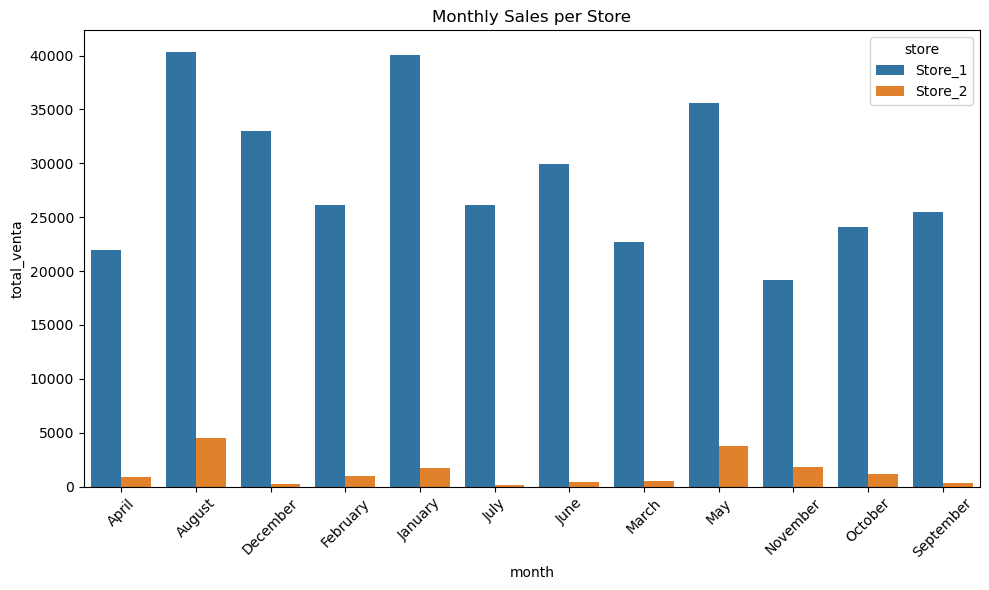

In [60]:
plt.figure(figsize=(10,6))
sns.barplot(x='month', y='total_venta', hue='store', data=monthly_sales)
plt.title('Monthly Sales per Store')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [61]:
# LOAD: Export processed datasets and reports

In [62]:
output_processed = "../data/processed/"
output_reports = "../outputs/"

In [63]:
os.makedirs(output_processed, exist_ok=True)
os.makedirs(output_reports, exist_ok=True)

In [64]:
# Save cleaned and merged data
df_sales.to_csv(os.path.join(output_processed, "merged_sales.csv"), index=False)

In [65]:
# Save monthly summary
monthly_sales.to_csv(os.path.join(output_reports, "monthly_summary.csv"), index=False)

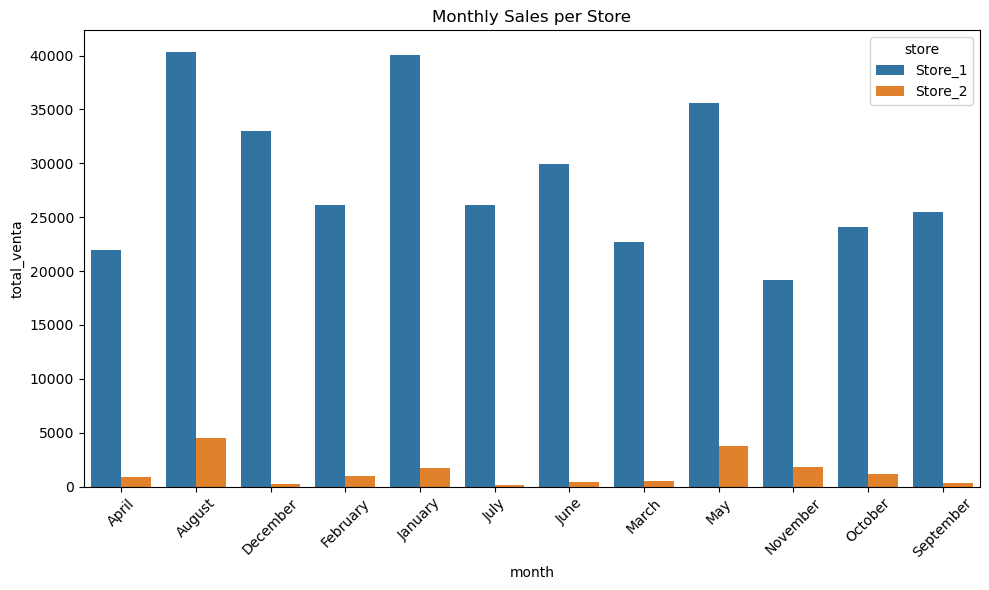

In [66]:
# Export last chart
plt.figure(figsize=(10,6))
sns.barplot(x='month', y='total_venta', hue='store', data=monthly_sales)
plt.title('Monthly Sales per Store')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_reports, "sales_report.png"))

In [76]:
# RUNNING THE FULL ETL PIPELINE

In [77]:
#from src.etl_pipeline import extract_data, transform_data, load_data
#from src.utils import validate_data, generate_sales_report

In [78]:
# Define paths
#file_path_1 = "../data/raw/Store_Sales_Data.csv"
#file_path_2 = "../data/raw/Store_Sales_Data2.csv"

In [79]:
#print("Starting ETL pipeline...")

In [80]:
# Execute ETL steps
#df_sales = extract_data(file_path_1, file_path_2)
#df_sales = transform_data(df_sales)
#validate_data(df_sales)
#merged_file = load_data(df_sales)

In [81]:
# Generate visualization
# generate_sales_report(df_sales)

In [82]:
# print("ETL pipeline completed successfully.")